# **Baixando dados dos balanços das empresas listadas na Bolsa**

Base de Dados CVM

http://www.cvm.gov.br


## *Configurações Iniciais*

In [ ]:
!pip install wget

In [ ]:
import pandas as pd
import wget
from zipfile import ZipFile


In [ ]:
url_base = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/'

* Criando uma lista com o nome de todos os arquivos

In [ ]:
arquivos_zip = []
for ano in range(2011,2021):
  arquivos_zip.append(f'itr_cia_aberta_{ano}.zip')

arquivos_zip


Fazendo o download dos arquivos. 

In [ ]:
for arq in arquivos_zip:
  wget.download(url_base+arq)
  

* extraindo os arquivos zip

In [ ]:
for arq in arquivos_zip:
  ZipFile(arq, 'r').extractall('CVM')

* Criando arquivos históricos

In [ ]:
nomes = ['BPA_con', 'BPA_ind', 'BPP_con', 'BPP_ind', 'DFC_MD_con', 'DFC_MD_ind', 'DFC_MI_con', 'DFC_MI_ind', 'DMPL_con', 'DMPL_ind', 'DRE_con', 'DRE_ind', 'DVA_con', 'DVA_ind']
for nome in nomes:
  arquivo = pd.DataFrame()
  for ano in range(2011,2021):
    arquivo = pd.concat([arquivo, pd.read_csv(f'CVM/itr_cia_aberta_{nome}_{ano}.csv', sep=';', decimal=',', encoding='ISO-8859-1')])
  arquivo.to_csv(f'DADOS/itr_cia_aberta_{nome}_2011-2020', index=False)


# **Buscando os dados para a Análise Fundamentalista**

In [1]:
import requests
import pandas as pd

In [2]:
url = 'https://www.fundamentus.com.br/resultado.php'
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [3]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]



In [4]:
df


Papel  Cotação      P/L   P/VP     PSR Div.Yield  P/Ativo  P/Cap.Giro  \
0     PMET3     0.00     0.00   0.00   0.000     0,00%    0.000        0.00   
1     CLAN3     0.00     0.00   0.00   0.000     0,00%    0.000        0.00   
2     CSTB3   150.00     0.00   0.00   0.000     0,00%    0.000        0.00   
3     PORP4     2.40     0.00   0.00   0.000     0,00%    0.000        0.00   
4     MNSA4     0.47     0.00   0.00   0.000     0,00%    0.000        0.00   
..      ...      ...      ...    ...     ...       ...      ...         ...   
948   LWSA3    26.98   800.19  23.44  32.355     0,10%   10.876       44.26   
949   PRBC4    14.54   808.37  39.12   0.000     0,00%    0.000        0.00   
950  UBBR11    14.75  1201.81   3.91   0.000     0,00%    0.000        0.00   
951   UBBR3    18.00  1466.61   4.77   0.000     0,00%    0.000        0.00   
952   DMVF3     9.67  3978.30   0.59   0.487     0,00%    0.336        2.96   

     P/EBIT  P/Ativ Circ.Liq  ...  EV/EBITDA  Mrg Ebit Mrg. Líq. Liq. Corr.  \
0      0.00             0.00  ...       0.00     0,00%     0,00%       0.00   
1      0.00             0.00  ...       0.00     0,00%     0,00%       0.00   
2      0.00             0.00  ...       0.00    40,85%    28,98%       2.60   
3      0.00             0.00  ...       0.00     0,00%     0,00%       0.00   
4      0.00             0.00  ...       0.00  -208,15%  -362,66%       3.63   
..      ...              ...  ...        ...       ...       ...        ...   
948  364.99           542.74  ...     155.44     8,86%     4,04%       1.79   
949    0.00             0.00  ...       0.00     0,00%     0,00%       0.00   
950    0.00             0.00  ...       0.00     0,00%     0,00%       0.00   
951    0.00             0.00  ...       0.00     0,00%     0,00%       0.00   
952    8.35            -3.60  ...       3.06     5,83%     0,01%       1.52   

        ROIC      ROE   Liq.2meses   Patrim. Líq  Dív.Brut/ Patrim.  \
0      0,00%    4,10%          0.0 -2.908630e+08               0.00   
1      0,00%   -1,05%          0.0  1.012240e+09               0.00   
2     22,40%   20,11%          0.0  8.420670e+09               0.14   
3      0,00%   -2,08%          0.0  2.239900e+07               0.00   
4    -13,50%  145,70%          0.0 -9.105000e+06              -6.52   
..       ...      ...          ...           ...                ...   
948    4,30%    2,93%  241992000.0  6.739730e+08               0.23   
949    0,00%    4,84%          0.0  1.210880e+09               0.00   
950    0,00%    0,33%          0.0  1.031720e+10               0.00   
951    0,00%    0,33%          0.0  1.031720e+10               0.00   
952    5,25%    0,01%    2926310.0  8.361590e+08               0.16   

     Cresc. Rec.5a  
0           37,74%  
1          -63,96%  
2           31,91%  
3           13,66%  
4          -41,11%  
..             ...  
948         24,50%  
949         11,60%  
950         10,58%  
951         10,58%  
952        -11,29%  

[953 rows x 21 columns]

In [23]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.', '')
  df[coluna] = df[coluna].str.replace(',', '.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100

In [24]:
df

Papel  Cotação      P/L   P/VP     PSR  Div.Yield  P/Ativo  P/Cap.Giro  \
0    MRSA6B     0.00     0.00   0.00   0.000     0.0000    0.000        0.00   
1     IVTT3     0.00     0.00   0.00   0.000     0.0000    0.000        0.00   
2     VSPT4     0.00     0.00   0.00   0.000     0.0000    0.000        0.00   
3    EQMA6B     0.00     0.00   0.00   0.000     0.0000    0.000        0.00   
4     MNSA4     0.47     0.00   0.00   0.000     0.0000    0.000        0.00   
..      ...      ...      ...    ...     ...        ...      ...         ...   
936   LWSA3    27.73   916.29  24.71  35.820     0.0010   13.330       35.41   
937  UBBR11    14.75  1201.81   3.91   0.000     0.0000    0.000        0.00   
938   UBBR3    18.00  1466.61   4.77   0.000     0.0000    0.000        0.00   
939   GUAR4   151.00  1661.32  15.52  11.645     0.0000    5.746       30.19   
940   APER3    43.76  4925.15   2.81   4.986     0.0012    1.706       13.86   

      P/EBIT  P/Ativ Circ.Liq  ...  EV/EBITDA  Mrg Ebit  Mrg. Líq.  \
0       0.00             0.00  ...       0.00    0.0000     0.0000   
1       0.00             0.00  ...       0.00    0.0000     0.0000   
2       0.00             0.00  ...       0.00    0.0000     0.0000   
3       0.00             0.00  ...       0.00    0.0000     0.0000   
4       0.00             0.00  ...       0.00   -2.0815    -3.6266   
..       ...              ...  ...        ...       ...        ...   
936   352.31            53.25  ...     154.12    0.1017     0.0391   
937     0.00             0.00  ...       0.00    0.0000     0.0000   
938     0.00             0.00  ...       0.00    0.0000     0.0000   
939  -766.71          -186.18  ...     189.56   -0.0152     0.0070   
940 -1504.09           -13.61  ...      70.00   -0.0033     0.0010   

     Liq. Corr.    ROIC     ROE   Liq.2meses   Patrim. Líq  Dív.Brut/ Patrim.  \
0          0.00  0.0000  0.0675          0.0  4.306220e+09               0.00   
1          0.00  0.0000 -0.0040          0.0  1.083050e+09               0.00   
2          0.00  0.0000 -0.0221          0.0  5.139110e+09               0.00   
3          0.00  0.0000  0.2037          0.0  3.230000e+09               0.00   
4          3.63 -0.1350  1.4570          0.0 -9.105000e+06              -6.52   
..          ...     ...     ...          ...           ...                ...   
936        2.13  0.0707  0.0270  244408000.0  6.570610e+08               0.26   
937        0.00  0.0000  0.0033          0.0  1.031720e+10               0.00   
938        0.00  0.0000  0.0033          0.0  1.031720e+10               0.00   
939        1.47 -0.0106  0.0093          0.0  4.855730e+09               0.93   
940        1.86 -0.0014  0.0006    2738990.0  1.790790e+08               0.00   

     Cresc. Rec.5a  
0           0.0004  
1           0.2067  
2           0.1125  
3           0.0652  
4          -0.4111  
..             ...  
936         0.0000  
937         0.1058  
938         0.1058  
939         0.0403  
940        -0.0808  

[941 rows x 21 columns]

Analisando os Dados


In [25]:
df = df[df['Cotação'] > 0.10]
df.sort_values(by=['Cotação'], ascending=True).head(20)

Papel  Cotação    P/L  P/VP    PSR  Div.Yield  P/Ativo  P/Cap.Giro  \
255   FTRX4     0.11  -0.13 -0.02  0.174        0.0    0.019       -0.03   
852   RHDS3     0.11  39.98  3.24  0.548        0.0    0.790      -65.29   
272   GAFP3     0.12  -0.04 -0.01  0.372        0.0    0.015       -0.09   
218   IENG5     0.12  -0.65  0.79  1.374        0.0    0.088       -0.93   
252   FTRX3     0.13  -0.15 -0.02  0.206        0.0    0.023       -0.04   
211   IENG3     0.15  -0.81  0.99  1.717        0.0    0.110       -1.17   
428  AGEN33     0.16   0.39 -0.03  0.000        0.0    0.066       -0.17   
182   DJON4     0.18  -1.70  0.22 -0.956        0.0    0.166       -1.29   
900   CTPC3     0.20  76.36  1.08  0.000        0.0    0.097        0.00   
197   PMET6     0.20  -1.21 -0.05  1.390        0.0    9.307       -0.07   
241   WISA3     0.20  -0.28 -0.01  0.175        0.0    0.023       -0.05   
156   STRP4     0.21  -2.85 -0.43  0.416        0.0    0.111       -0.18   
233   WISA4     0.25  -0.35 -0.01  0.219        0.0    0.029       -0.06   
311   GALO4     0.25   0.00  0.00  0.000        0.0    0.000        0.00   
375   RPMG4     0.26   0.00 -0.01  0.000        0.0    0.006       -0.01   
181   BCAL6     0.28  -1.70 -0.07  1.946        0.0   13.030       -0.09   
280  MILK33     0.30  -0.02 -0.02  0.077        0.0    0.029       -0.08   
318   ARPS3     0.30   0.00  0.00  0.000        0.0    0.000        0.00   
232   FGUI4     0.38  -0.39 -0.07  0.507        0.0    0.798       -0.07   
265   MNDL4     0.38  -0.06 -0.01  0.002        0.0    0.001       -0.00   

     P/EBIT  P/Ativ Circ.Liq  ...  EV/EBITDA  Mrg Ebit  Mrg. Líq.  Liq. Corr.  \
255   -0.16            -0.01  ...      -2.24   -1.0622    -1.3883        0.06   
852    7.49            -2.70  ...       8.06    0.0731     0.0117        0.97   
272   -0.48            -0.01  ...     -46.92   -0.7757    -9.8128        0.51   
218    3.10            -0.24  ...      24.33    0.4429    -2.2461        0.85   
252   -0.19            -0.01  ...      -2.27   -1.0622    -1.3883        0.06   
211    3.88            -0.30  ...      25.11    0.4429    -2.2461        0.85   
428    0.11            -0.02  ...       3.61    0.0000     0.0000        0.09   
182   -1.42            -0.85  ...      -1.98    0.6737     0.5633        0.24   
900  -16.86             0.00  ...     -18.75    0.0000     0.0000        0.00   
197   27.69            -0.05  ...     441.57    0.0502    -1.1449        0.01   
241   -0.25            -0.01  ...     -19.21   -0.7141    -0.6275        0.18   
156   -0.45            -0.09  ...      -1.15   -0.9182    -0.1458        0.13   
233   -0.31            -0.01  ...     -19.27   -0.7141    -0.6275        0.18   
311    0.00             0.00  ...      -0.00    0.1398    -1.8458        0.00   
375    0.00            -0.01  ...       0.00    0.0000     0.0000        0.50   
181   38.77            -0.07  ...     452.65    0.0502    -1.1449        0.01   
280   -0.04            -0.02  ...      -0.12   -1.7680    -5.0808        0.50   
318    0.00             0.00  ...     -14.08   -0.0492    -0.1159        0.91   
232   -1.83            -0.06  ...     -14.24   -0.2772    -1.2900        0.04   
265    0.02            -0.00  ...       2.85    0.0799    -0.0326        0.30   

       ROIC     ROE  Liq.2meses   Patrim. Líq  Dív.Brut/ Patrim.  \
255 -0.1199  0.1350         0.0 -1.545350e+08              -0.16   
852  0.1180  0.0812         0.0  2.720450e+08               1.49   
272 -0.0321  0.3879         0.0 -8.071250e+07              -1.43   
218  0.0284 -1.2241         0.0  5.223400e+07               5.45   
252 -0.1199  0.1350         0.0 -1.545350e+08              -0.16   
211  0.0284 -1.2241         0.0  5.223400e+07               5.45   
428  0.8767 -0.0885         0.0 -1.112630e+09              -1.11   
182 -0.1202 -0.1284         0.0  2.702000e+06               0.09   
900  0.0000  0.0141         0.0  2.411000e+06               0.00   
197  0.3897  0.0410        

In [26]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,161)
ranking['EV/EBIT'] = df[df['EV/EBIT'] > 0].sort_values(by=['EV/EBIT'])['Papel'][:160].values
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:160].values

In [27]:
ranking

pos EV/EBIT    ROIC
0      1   TPRC3   TRPN3
1      2   CMMA4   ADHM3
2      3   MTBR4   VTLM3
3      4   MSAN4   BPHA3
4      5   MSAN3   MPLU3
..   ...     ...     ...
155  156   CYRE4  TAEE11
156  157   USIM6   TAEE4
157  158   VIVO4   CPFP4
158  159   PTPA4   WLMM3
159  160   NEOE3   WLMM4

[160 rows x 3 columns]

In [28]:
a =  ranking.pivot_table(columns='EV/EBIT', values='pos')

In [29]:
b =  ranking.pivot_table(columns='ROIC', values='pos')

In [30]:
t = pd.concat([a,b])
t

ACES3  ACES4  AGEN33  ALUP11  ALUP3  ALUP4  AMPI3  ASSM3  ASSM4  ATOM3  \
pos    134    132      62   117.0  118.0  116.0     38     37     35    130   
pos     48     47       6     NaN    NaN    NaN     93     28     29      7   

     ...  UNIP3  UNIP5  UNIP6  VTLM3  WEGE3  WEGE4  WHRL3  WHRL4  WLMM3  WLMM4  
pos  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
pos  ...  141.0  139.0  140.0    3.0   75.0   74.0   26.0   25.0  159.0  160.0  

[2 rows x 250 columns]

In [31]:
rank = t.dropna(axis=1).sum()
rank

ACES3     182
ACES4     179
AGEN33     68
AMPI3     131
ASSM3      65
         ... 
VCPA4     145
VIVO3     209
VIVO4     229
WIZS3      42
WSON33    290
Length: 70, dtype: int64

In [32]:
rank.sort_values(ascending=True)[:20]

PSSA3     17
MTBR4     30
DSUL3     33
BPHA3     33
WIZS3     42
CSPC4     61
CSPC3     61
ASSM4     64
ASSM3     65
AGEN33    68
SALM3     71
SALM4     71
GAZO4     71
VALE5     75
GAZO3     80
TSPP4     89
MNPR4     93
BELG4     96
BELG3     98
MRFG3     98
dtype: int64

In [57]:
url = 'https://www.fundamentus.com.br/detalhes.php?papel=BPHA3'
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [58]:
df1 = pd.read_html(r.text,  decimal=',', thousands='.')

In [59]:
df1

[           0                               1                2           3
 0     ?Papel                           BPHA3         ?Cotação        0.62
 1      ?Tipo                           ON NM    ?Data últ cot  10/06/2019
 2   ?Empresa        BRAZIL PHARMA S.A. ON NM      ?Min 52 sem        0.62
 3     ?Setor         Comércio e Distribuição      ?Max 52 sem        1.69
 4  ?Subsetor  Medicamentos e Outros Produtos  ?Vol $ méd (2m)           0,
                    0          1                        2           3
 0  ?Valor de mercado   70110200  ?Últ balanço processado  31/03/2019
 1    ?Valor da firma  144626000              ?Nro. Ações   113081000,
              0           1                             2  \
 0   Oscilações  Oscilações  Indicadores fundamentalistas   
 1          Dia       0,00%                          ?P/L   
 2          Mês       0,00%                         ?P/VP   
 3      30 dias       0,00%                       ?P/EBIT   
 4     12 meses     -60,00%      

# O interessante é que pesquisando direto desse site conseguimos os valores atuais. Já quando buscamos os dados diretamente da CVM, nós conseguimos os históricos das empresas desde 2011.


In [15]:
!pip install git+https://github.com/quantopian/pyfolio
!pip install yfinance 
!pip install pulp


  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-328_8b7m
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-328_8b7m
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75762 sha256=4657e59280f3abbc9f6b7ee908aa7abe4aba0ba7d49a262e71ba4c75b1e9864f
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ycx623m/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
Successfully built pyfolio


In [2]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
import pulp as p

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


/home/felipe/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# **Obtendo e Tratando Dados**

In [5]:
#'PETR4.SA', 'CCRO3.SA', 'ITUB4.SA','VALE3.SA',
tickers = {'PSSA3.SA', 'MRFG3.SA', '^BVSP'}
up = web.get_data_yahoo(tickers, start='2018-01-05')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [6]:
#Ações de utilidade publica - Sabesp/Eletrobrás/Energisa
up

MRFG3.SA   PSSA3.SA          ^BVSP
Date                                           
2018-01-05   6.760384  14.207587   79071.000000
2018-01-08   6.639662  14.136189   79379.000000
2018-01-09   6.556087  14.233889   78864.000000
2018-01-10   6.546800  14.542014   78201.000000
2018-01-11   6.556087  14.838867   79365.000000
...               ...        ...            ...
2021-11-24  25.170000  22.520000  104514.000000
2021-11-25  24.450001  23.540001  105811.000000
2021-11-26  23.700001  22.889999  102290.000000
2021-11-29  23.879999  22.850000  102814.000000
2021-11-30  22.879999  22.150000  100232.609375

[952 rows x 3 columns]

In [7]:
retorno = up.pct_change()
retorno

MRFG3.SA  PSSA3.SA     ^BVSP
Date                                    
2018-01-05       NaN       NaN       NaN
2018-01-08 -0.017857 -0.005025  0.003895
2018-01-09 -0.012587  0.006911 -0.006488
2018-01-10 -0.001416  0.021647 -0.008407
2018-01-11  0.001418  0.020413  0.014885
...              ...       ...       ...
2021-11-24 -0.021384  0.006256  0.008209
2021-11-25 -0.028605  0.045293  0.012410
2021-11-26 -0.030675 -0.027613 -0.033276
2021-11-29  0.007595 -0.001747  0.005123
2021-11-30 -0.041876 -0.030635 -0.025107

[952 rows x 3 columns]

In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

MRFG3.SA  PSSA3.SA     ^BVSP
Date                                    
2018-01-05  1.000000  1.000000  1.000000
2018-01-08  0.982143  0.994975  1.003895
2018-01-09  0.969780  1.001851  0.997382
2018-01-10  0.968407  1.023539  0.988997
2018-01-11  0.969780  1.044433  1.003718
...              ...       ...       ...
2021-11-24  3.723162  1.585069  1.321774
2021-11-25  3.616659  1.656861  1.338177
2021-11-26  3.505718  1.611111  1.293647
2021-11-29  3.532344  1.608296  1.300274
2021-11-30  3.384423  1.559026  1.267628

[952 rows x 3 columns]

In [9]:
carteira = 1000 * retorno_acumulado.iloc[:, :5]
carteira['Saldo'] = carteira.sum(axis=1) - carteira['^BVSP']
carteira['Retorno'] = carteira['Saldo'].pct_change()
carteira 

MRFG3.SA     PSSA3.SA        ^BVSP        Saldo   Retorno
Date                                                                    
2018-01-05  1000.000000  1000.000000  1000.000000  2000.000000       NaN
2018-01-08   982.142827   994.974605  1003.895233  1977.117432 -0.011441
2018-01-09   969.780255  1001.851221   997.382100  1971.631476 -0.002775
2018-01-10   968.406605  1023.538612   988.997230  1991.945217  0.010303
2018-01-11   969.780255  1044.432593  1003.718177  2014.212849  0.011179
...                 ...          ...          ...          ...       ...
2021-11-24  3723.161516  1585.068603  1321.774102  5308.230119 -0.013291
2021-11-25  3616.658786  1656.861261  1338.177081  5273.520047 -0.006539
2021-11-26  3505.718336  1611.110951  1293.647481  5116.829286 -0.029713
2021-11-29  3532.343807  1608.295623  1300.274437  5140.639430  0.004653
2021-11-30  3384.423206  1559.026120  1267.627947  4943.449327 -0.038359

[952 rows x 5 columns]

# **Resultados**

### **O Índice de Sharpe ajuda a entender qual investimento oferece o maior retorno em relação ao risco assumido**

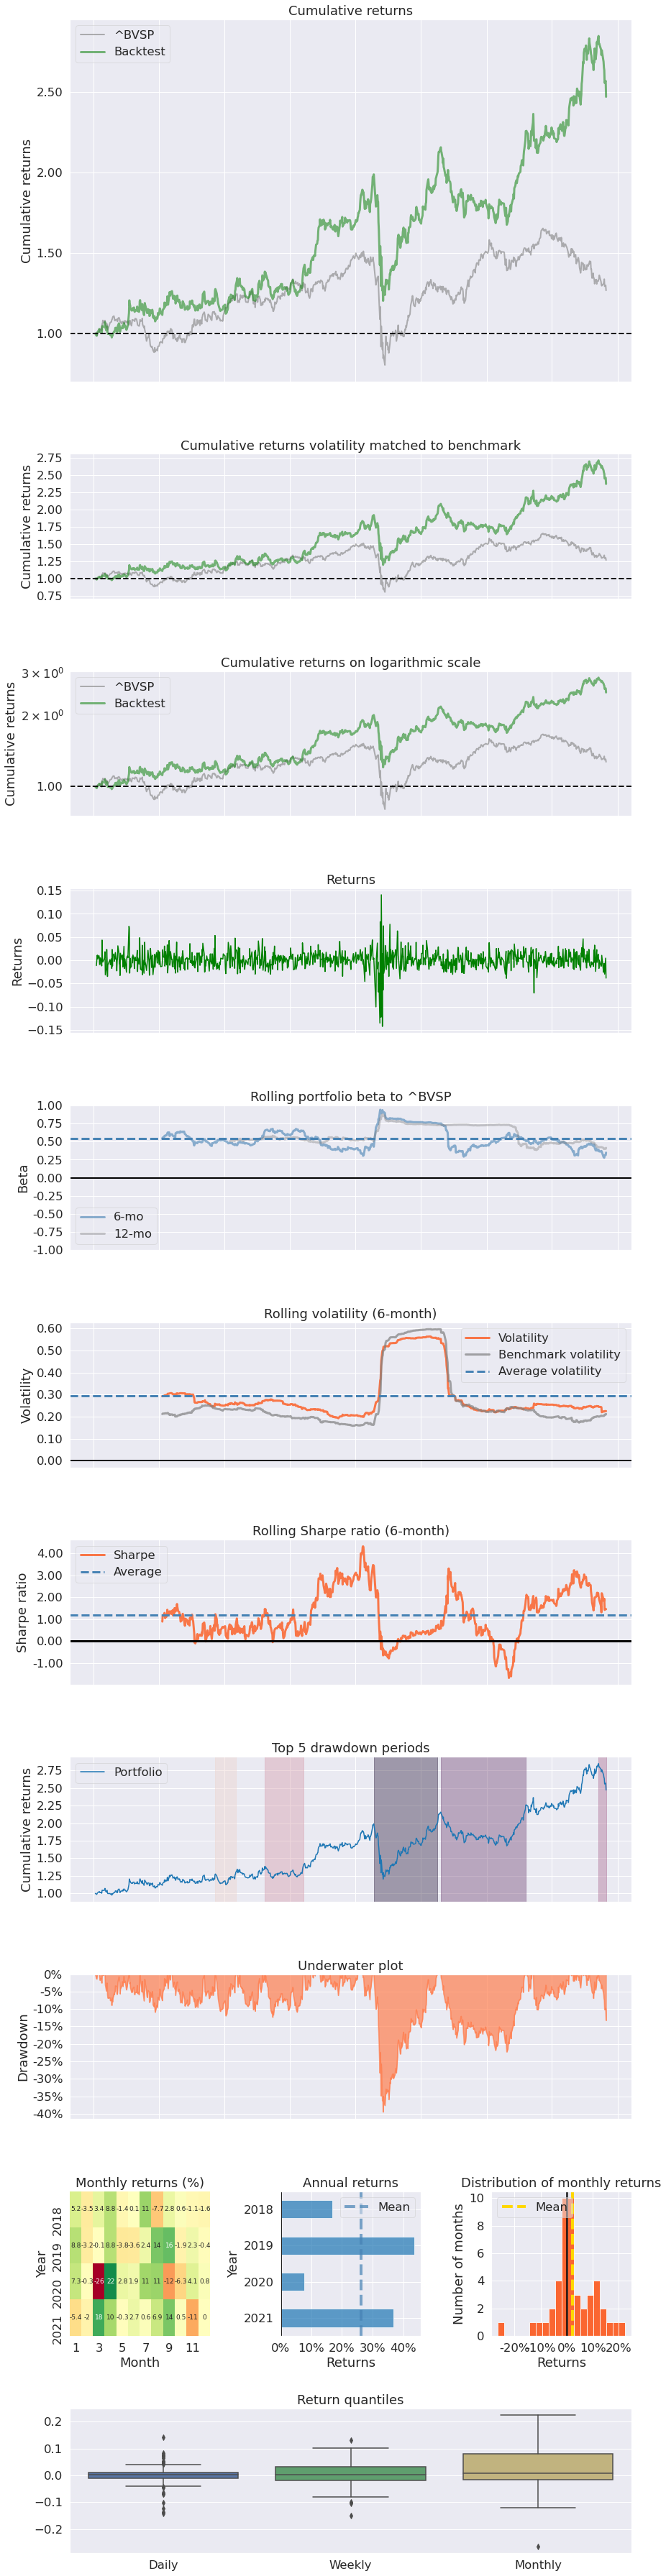

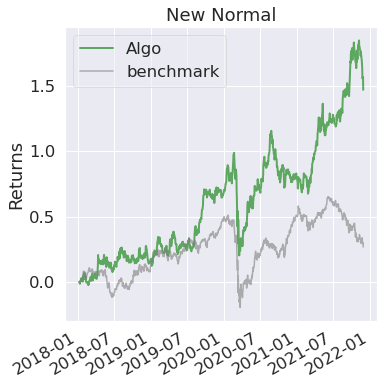

In [10]:
pf.create_full_tear_sheet(carteira['Retorno'], benchmark_rets=retorno['^BVSP'])

INDICE DE SHARP: Para cada 1 ponto de risco que o investidor correu no passado com o fundo X ele obteve um retorno de 0,1 pontos de rentabilidade acima daquela recebida se tivesse optado por um investimento livre de risco.

In [36]:
from collections import OrderedDict

Um dado cliente exige aplicar:

(a) não mais que 25% do total em um único título

(b) no máximo 50% do total em títulos com alto risco

(c) mais de 50% do total em títulos com vencimento superior a 10 anos.

Para máxima rentabilidade, que percentual do total deve ser aplicado em cada título?

Identificando os elementos do problema
Variáveis de decisão

Percentual do total a ser aplicado em cada título

Função-Objetivo

(X) Max - Rentabilidade (ao ano) de todas as aplicações.

Restrições às variáveis

Exigências quanto a: diversificação, carência, segurança, investir a totalidade

Parâmetros

Caracterização de cada título: riscos, taxas de retorno, vencimentos.

In [37]:
prob = p.LpProblem('Rentabilidade', p.LpMaximize)

In [38]:
#Setando as variáveis de decisão
p1 = p.LpVariable('p1', lowBound=0)
p2 = p.LpVariable('p2', lowBound=0)
p3 = p.LpVariable('p3', lowBound=0)
p4 = p.LpVariable('p4', lowBound=0)
p5 = p.LpVariable('p5', lowBound=0)
p6 = p.LpVariable('p6', lowBound=0)

#Setando as taxas de retorno ao ano dos títulos
i1 = 0.087  #15 anos, Muito Baixo
i2 = 0.095  #12 anos, Regular
i3 = 0.120  #8 anos, Alto
i4 = 0.090  #7 anos, Baixo
i5 = 0.13   #11 anos, Alto
i6 = 0.200  #5 anos, Muito Alto

In [ ]:
#Criando a função objetivo
prob += i1 * (p1*0.01) + i2 * (p2*0.01) + i3 * (p3*0.01) + i4 * (p4*0.01) + i5 * (p5*0.01) + i6 * (p6*0.01)

#Criando as restrições e parâmetros. 
prob += p1 + p2 + p3 + p4 + p5 + p6 ==1
prob += p1 <=0.25
prob += p2 <=0.25
prob += p3 <=0.25
prob += p4 <=0.25
prob += p5 <=0.25
prob += p6 <=0.25
prob += p3 + p5 + p6 <=0.5
prob += p1 + p2 + p5 >=0.5
prob += p1 >=0
prob += p2 >=0
prob += p3 >=0
prob += p4 >=0
prob += p5 >=0
prob += p6 >=0


In [ ]:
#Resolvendo o Problema
status = prob.solve() 
print(p.LpStatus[status])
print(p.value(prob.objective))

#Exibindo a solução final

df = OrderedDict({
    'Título 1' :[p.value(p1)],
    'Título 2' :[p.value(p2)],
    'Título 3' :[p.value(p3)],
    'Título 4' :[p.value(p4)],
    'Título 5' :[p.value(p5)],
    'Título 6' :[p.value(p6)]
})

format_dict = {
    'Título 1': '{:.1%}',
    'Título 2': '{:.1%}',
    'Título 3': '{:.1%}',
    'Título 4': '{:.1%}',
    'Título 5': '{:.1%}',
    'Título 6': '{:.1%}',
}

df = pd.DataFrame(df)
df.style.format(format_dict).hide_index()



Aqui, vamos colocar os títulos com os maiores rendimentos de 2020. E com base neles vamos criar as restrições e parâmetros do nosso modelo. 

In [39]:
prob = p.LpProblem('Rentabilidade', p.LpMaximize)

In [40]:
#Setando as variáveis de decisão
p1 = p.LpVariable('p1', lowBound=0)
p2 = p.LpVariable('p2', lowBound=0)
p3 = p.LpVariable('p3', lowBound=0)

#Setando as taxas de retorno ao ano dos título
i1 = 0.1781 #Retorno da carteira 1
i2 = 0.1741  #Retorno da carteira 2
i3 = 0.3845  #Retorno da carteira 3


In [41]:
#Criando a função objetivo
prob += i1 * (p1*0.33) + i2 * (p2*0.33) + i3 * (p3*0.33) 
#Criando as restrições e parâmetros. 
prob += p1 + p2 + p3 ==1
prob += p1 <=0.9
prob += p2 <=0.9
prob += p3 <=0.9
prob += p1 + p3 <=0.5
prob += p1 + p2 >=0.5
prob += p1 >=0
prob += p2 >=0
prob += p3 >=0


In [42]:
#Resolvendo o Problema
status = prob.solve() 
print(p.LpStatus[status])
print(p.value(prob.objective))

#Exibindo a solução final

df = OrderedDict({
    'Título 1' :[p.value(p1)],
    'Título 2' :[p.value(p2)],
    'Título 3' :[p.value(p3)]  
})

format_dict = {
    'Título 1': '{:.1%}',
    'Título 2': '{:.1%}',
    'Título 3': '{:.1%}'
}

df = pd.DataFrame(df)
df.style.format(format_dict).hide_index()

Optimal
0.092169


In [11]:
#'PETR4.SA', 'CCRO3.SA', 'ITUB4.SA','VALE3.SA','^BVSP'
tickers = {'^BVSP'}
up = web.get_data_yahoo(tickers, start='2014-01-05')


[*********************100%***********************]  1 of 1 completed


In [12]:
up

Open         High            Low          Close  \
Date                                                                  
2014-01-06   50980.00000   51002.0000   50451.000000   50974.000000   
2014-01-07   50982.00000   51478.0000   50429.000000   50430.000000   
2014-01-08   50431.00000   50793.0000   50424.000000   50577.000000   
2014-01-09   50576.00000   50576.0000   49259.000000   49322.000000   
2014-01-10   49322.00000   50145.0000   49267.000000   49696.000000   
...                  ...          ...            ...            ...   
2021-11-24  103652.00000  105041.0000  102464.000000  104514.000000   
2021-11-25  104514.00000  106400.0000  104514.000000  105811.000000   
2021-11-26  105810.00000  105810.0000  101495.000000  102290.000000   
2021-11-29  102227.00000  104149.0000  102226.000000  102814.000000   
2021-11-30  102814.03125  103066.4375  100074.609375  100342.953125   

                Adj Close    Volume  
Date                                 
2014-01-06   50974.000000   3727800  
2014-01-07   50430.000000   3339500  
2014-01-08   50577.000000   2916500  
2014-01-09   49322.000000   3702600  
2014-01-10   49696.000000   3509600  
...                   ...       ...  
2021-11-24  104514.000000  10466600  
2021-11-25  105811.000000   7890400  
2021-11-26  102290.000000  10969100  
2021-11-29  102814.000000  10283300  
2021-11-30  100342.953125         0  

[1941 rows x 6 columns]

<AxesSubplot:title={'center':'Ação Analisada'}, xlabel='Date'>

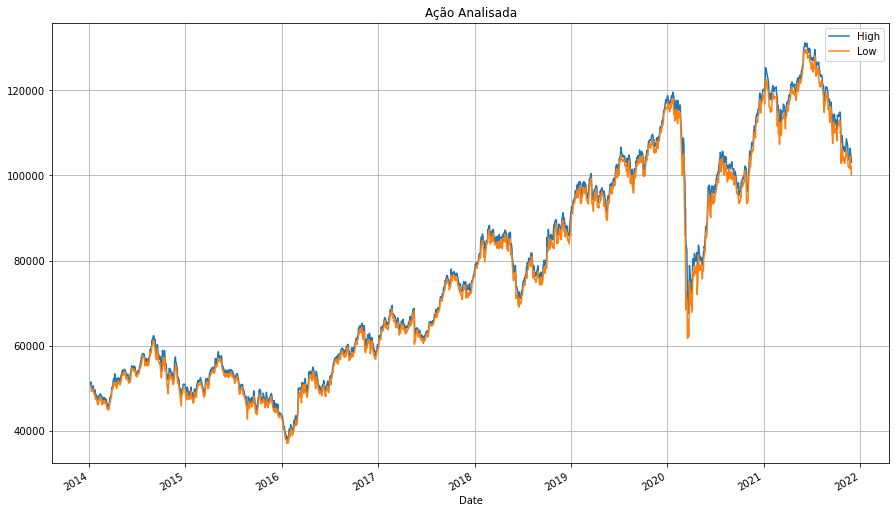

In [13]:
up[['High', 'Low']].plot(figsize=(15, 9), title='Ação Analisada', grid=True)

In [14]:
# Média movel de 20 dias do Fechamento
up['MovingMean20'] = up.Close.rolling(20).mean()
# Média movel de 72 dias do Fechamento
up['MovingMean72'] = up.Close.rolling(72).mean()
# Média movel de 200 dias do Fechamento
up['MovingMean200'] = up.Close.rolling(200).mean()


In [15]:
up

Open         High            Low          Close  \
Date                                                                  
2014-01-06   50980.00000   51002.0000   50451.000000   50974.000000   
2014-01-07   50982.00000   51478.0000   50429.000000   50430.000000   
2014-01-08   50431.00000   50793.0000   50424.000000   50577.000000   
2014-01-09   50576.00000   50576.0000   49259.000000   49322.000000   
2014-01-10   49322.00000   50145.0000   49267.000000   49696.000000   
...                  ...          ...            ...            ...   
2021-11-24  103652.00000  105041.0000  102464.000000  104514.000000   
2021-11-25  104514.00000  106400.0000  104514.000000  105811.000000   
2021-11-26  105810.00000  105810.0000  101495.000000  102290.000000   
2021-11-29  102227.00000  104149.0000  102226.000000  102814.000000   
2021-11-30  102814.03125  103066.4375  100074.609375  100342.953125   

                Adj Close    Volume   MovingMean20   MovingMean72  \
Date                                                                
2014-01-06   50974.000000   3727800            NaN            NaN   
2014-01-07   50430.000000   3339500            NaN            NaN   
2014-01-08   50577.000000   2916500            NaN            NaN   
2014-01-09   49322.000000   3702600            NaN            NaN   
2014-01-10   49696.000000   3509600            NaN            NaN   
...                   ...       ...            ...            ...   
2021-11-24  104514.000000  10466600  105315.100000  112680.583333   
2021-11-25  105811.000000   7890400  105218.900000  112460.833333   
2021-11-26  102290.000000  10969100  105018.600000  112175.833333   
2021-11-29  102814.000000  10283300  104723.550000  111895.208333   
2021-11-30  100342.953125         0  104419.697656  111591.610460   

            MovingMean200  
Date                       
2014-01-06            NaN  
2014-01-07            NaN  
2014-01-08            NaN  
2014-01-09            NaN  
2014-01-10            NaN  
...                   ...  
2021-11-24  118122.715000  
2021-11-25  118053.230000  
2021-11-26  117972.465000  
2021-11-29  117900.675000  
2021-11-30  117820.069766  

[1941 rows x 9 columns]

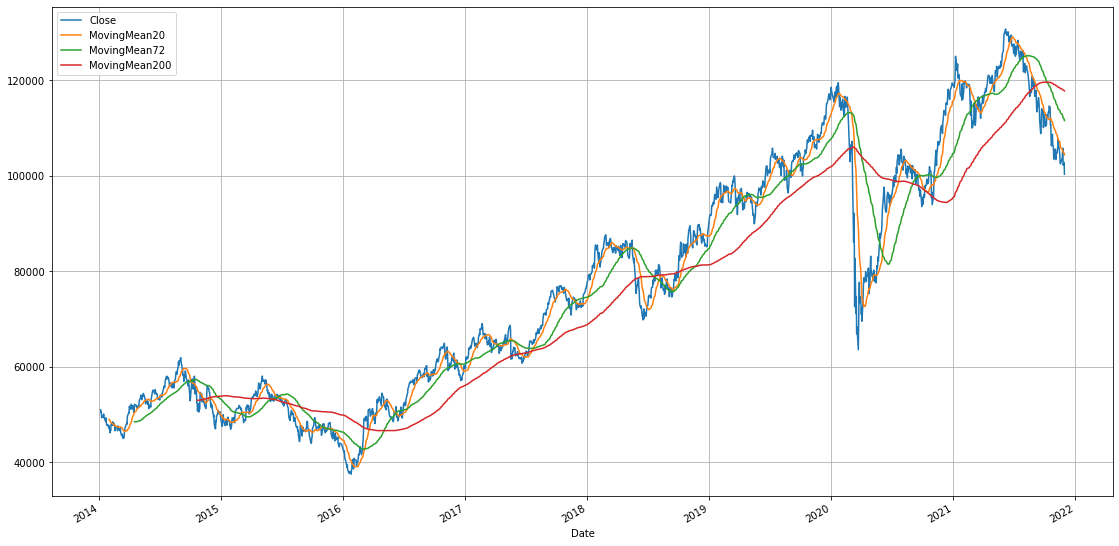

In [16]:
columns = ['Close','MovingMean20', 'MovingMean72', 'MovingMean200']
graph = up[columns].plot(figsize=(19, 10), grid=True)

<AxesSubplot:xlabel='Month', ylabel='Close'>

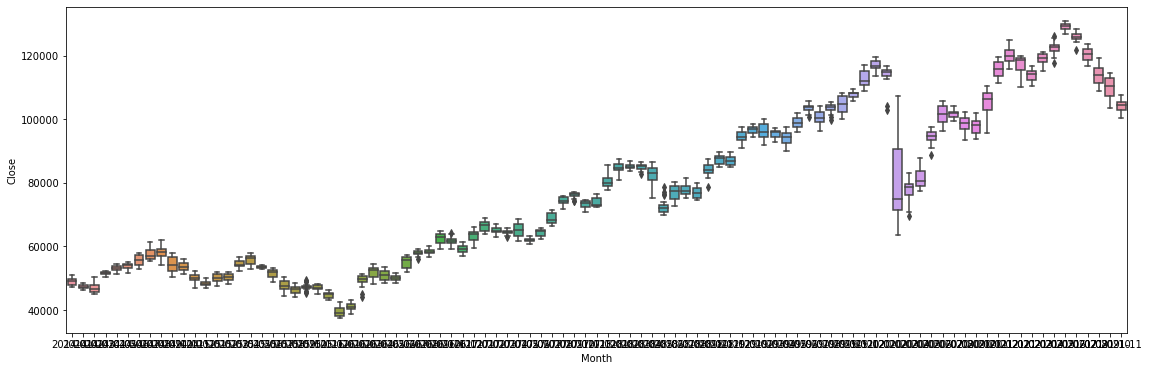

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(19, 6))
up['Month'] = up.index.to_period('M')
sns.boxplot('Month', 'Close', data=up, ax=ax1)

In [18]:
# importar as bibliotecas necessárias
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go

# criar um DataFrame vazio
df = pd.DataFrame()

In [19]:
# escolher a ação desejada
acao = 'ENGI3.SA'

# importar dados para o DataFrame
df = web.DataReader(acao, data_source='yahoo', start='2015-01-01')

# ver as 5 primeiras entradas
df.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2015-01-02  2.457647  2.457647  2.457647  2.457647   1.968747       0
2015-01-23  2.437986  2.437986  2.172560  2.172560   1.740372     610
2015-01-26  2.172560  2.172560  2.172560  2.172560   1.740372       0
2015-02-02  2.261035  2.261035  2.261035  2.261035   1.811247     203
2015-02-03  2.310188  2.310188  2.310188  2.310188   1.850622    5899

In [20]:
# plotar o gráfico de candlestick
trace1 = {
    'x': df.index,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': acao,
    'showlegend': False
}

data = [trace1]
layout = go.Layout()

fig = go.Figure(data=data, layout=layout)
fig.show()

In [21]:
# Calculate and define moving average of 21 periods
avg_21 = df.Close.rolling(window=21, min_periods=1).mean()

# Calculate and define moving average of 72 periods
avg_72 = df.Close.rolling(window=72, min_periods=1).mean()

# Calculate and define moving average of 200 periods
avg_200 = df.Close.rolling(window=200, min_periods=1).mean()

In [22]:
# Second instance - avg_21
trace2 = {
    'x': df.index,
    'y': avg_21,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'AVG 21 periods'
}

# Second instance - avg_72
trace3 = {
    'x': df.index,
    'y': avg_72,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'purple'
            },
    'name': 'AVG 72 periods'
}

# Second instance - avg_200
trace4 = {
    'x': df.index,
    'y': avg_200,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
            },
    'name': 'AVG 200 periods'
}

In [23]:
# Aggregate all instances and define 'data' variable
data = [trace1, trace2, trace3, trace4]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'ENGI3.SA - ENERGISA',
        'font': {
            'size': 14
        }
    }
})

In [24]:
# Create Figure and plot
fig = go.Figure(data=data, layout=layout)
fig.write_html("./ENGI3.SA-web.html")
fig.show()

In [25]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


In [26]:
# escolher a ação desejada
#'ENGI3.SA', 'CCRO3.SA', 'ITUB4.SA','VALE3.SA', 'CPLE3.SA', 'KLBN4.SA', 'GGBR4.SA', 'GOL'
acao = ['ETH-USD', 'ADA-USD', 'XRP-USD']

# importar dados para o DataFrame
df1 = web.DataReader(acao, data_source='yahoo', start='2019-01-01')['Close']

# ver as 5 primeiras entradas
df1.tail()

[*********************100%***********************]  3 of 3 completed


ADA-USD      ETH-USD   XRP-USD
Date                                       
2021-11-26  1.528420  4030.908936  0.936350
2021-11-27  1.546118  4096.912109  0.947158
2021-11-28  1.592855  4294.453613  0.968751
2021-11-29  1.602508  4445.104980  0.991961
2021-11-30  1.571508  4597.758301  1.002215

In [27]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df1)
S = risk_models.sample_cov(df1)


In [28]:
print(mu)
print('\n')
print(S)

ADA-USD    1.358514
ETH-USD    1.290363
XRP-USD    0.271604
dtype: float64


          ADA-USD   ETH-USD   XRP-USD
ADA-USD  0.859520  0.532312  0.525757
ETH-USD  0.532312  0.620753  0.477728
XRP-USD  0.525757  0.477728  0.980642


In [29]:

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ADA-USD', 0.28959), ('ETH-USD', 0.71041), ('XRP-USD', 0.0)])
Expected annual return: 131.0%
Annual volatility: 77.7%
Sharpe Ratio: 1.66


(1.310099360174014, 0.7774236015428249, 1.6594548423970739)